In [1]:
# prep environment
import requests
import json
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import requests
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
# define URL towards rat-brain-atlas
def atlasUrl(ml, ap, dv):
    api = 'http://labs.gaidi.ca/rat-brain-atlas/api.php?'
    url = f"{api}ml={ml}&ap={ap}&dv={dv}"
    return url


#def function to display 3 pictures with mark (red dot) similarly to home page
def ratBrainAtlas(ml, ap, dv):
    url = atlasUrl(ml, ap, dv)
    try:
        S = requests.get(url)
        S.raise_for_status()
    except requests.exceptions.HTTPError as err:
        print(f"Unable to complete web request: {err}")
        return None

    S = S.json()
    S['coronal']['image'] = Image.open(BytesIO(requests.get(S['coronal']['image_url']).content))
    S['sagittal']['image'] = Image.open(BytesIO(requests.get(S['sagittal']['image_url']).content))
    S['horizontal']['image'] = Image.open(BytesIO(requests.get(S['horizontal']['image_url']).content))

    # supply TRUE to make marking
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    for i, (key, value) in enumerate(S.items()):
        axs[i].imshow(value['image'])
        circ = patches.Circle((value['left'], value['top']), 10, fill=True, color='r')
        axs[i].add_patch(circ)
        axs[i].set_title(key.capitalize())

    plt.show()

    return S



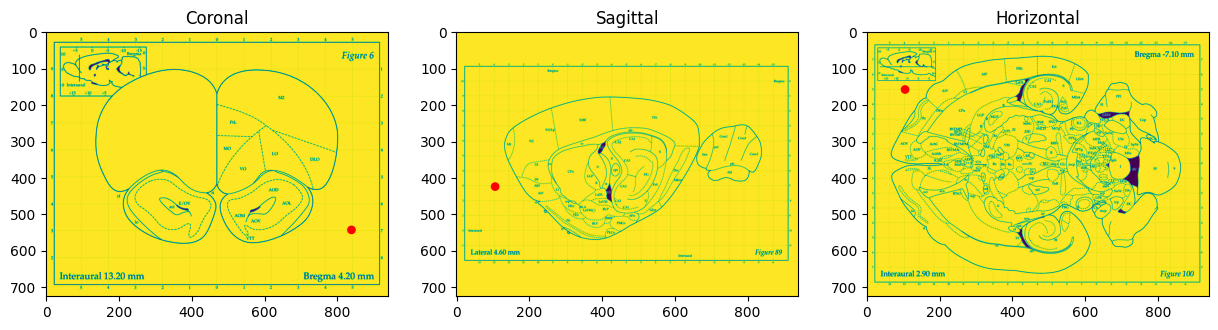

{'coronal': {'image_url': 'http://labs.gaidi.ca/rat-brain-atlas/images/Rat_Brain_Atlas_6.jpg',
  'left': 839,
  'top': 543,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=940x726>},
 'sagittal': {'image_url': 'http://labs.gaidi.ca/rat-brain-atlas/images/Rat_Brain_Atlas_89.jpg',
  'left': 106,
  'top': 424,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=940x726>},
 'horizontal': {'image_url': 'http://labs.gaidi.ca/rat-brain-atlas/images/Rat_Brain_Atlas_100.jpg',
  'left': 105,
  'top': 157,
  'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=940x726>}}

In [5]:
ratBrainAtlas(5, 4, 7)